In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor


from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
train = pd.read_csv('D:/Studies/Machine Learning/HackerEarth/Attrition/Dataset/Train.csv')
test = pd.read_csv('D:/Studies/Machine Learning/HackerEarth/Attrition/Dataset/Test.csv')
submission = pd.read_csv('D:/Studies/Machine Learning/HackerEarth/Attrition/Dataset/sample_submission.csv')

emp_id = test.Employee_ID

In [3]:
train

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [4]:
def print_shape():
    print(train.shape)
    print(test.shape)
    
def find_na():
    print(train.isnull().sum())
    print("_____________________________")
    print(test.isnull().sum())
    print("_____________________________")
def fill_labels():
    train.Gender[train.Gender == 'M'] = 0
    train.Gender[train.Gender == 'F'] = 1
    test.Gender[test.Gender == 'M'] = 0
    test.Gender[test.Gender == 'F'] = 1

    train.Relationship_Status[train.Relationship_Status == 'Married'] =0 
    test.Relationship_Status[test.Relationship_Status =='Married'] =0
    train.Relationship_Status[train.Relationship_Status == 'Single'] =1 
    test.Relationship_Status[test.Relationship_Status =='Single'] =1


    train.Compensation_and_Benefits[train.Compensation_and_Benefits == 'type0'] = 0
    train.Compensation_and_Benefits[train.Compensation_and_Benefits == 'type1'] = 1
    train.Compensation_and_Benefits[train.Compensation_and_Benefits == 'type2'] = 2
    train.Compensation_and_Benefits[train.Compensation_and_Benefits == 'type3'] = 3
    train.Compensation_and_Benefits[train.Compensation_and_Benefits == 'type4'] = 4
    test.Compensation_and_Benefits[test.Compensation_and_Benefits == 'type0'] = 0
    test.Compensation_and_Benefits[test.Compensation_and_Benefits == 'type1'] = 1
    test.Compensation_and_Benefits[test.Compensation_and_Benefits == 'type2'] = 2
    test.Compensation_and_Benefits[test.Compensation_and_Benefits == 'type3'] = 3
    test.Compensation_and_Benefits[test.Compensation_and_Benefits == 'type4'] = 4
    home = {'Franklin':0,'Springfield':1,'Clinton':2,'Lebanon':3,'Washington':4}

    train['Hometown'] = train['Hometown'].map(home)
    test['Hometown'] = test['Hometown'].map(home)
    uni = {'IT':0, 'Logistics':1, 'Quality':2, 'Human Resource Management':3, 'Purchasing':4,
    'Sales':5, 'Production':6, 'Operarions':7, 'Accounting and Finance':8, 'Marketing':9,
    'R&D':10, 'Security':11}

    train['Unit'] = train['Unit'].map(uni)
    test['Unit'] = test['Unit'].map(uni)
    dsp ={'Conceptual':0, 'Analytical':1, 'Behavioral':2, 'Directive':3}

    train['Decision_skill_possess'] = train['Decision_skill_possess'].map(dsp)
    test['Decision_skill_possess'] = test['Decision_skill_possess'].map(dsp)

In [5]:
# filling the train and test data with zero 
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

#calling fill_label function to make it value
fill_labels()

# dropping the employee _ID because it doesnt contribute much

train.drop(['Employee_ID'],axis=1,inplace=True)
test.drop(['Employee_ID'],axis=1,inplace=True)

In [6]:
# creating the data for the training
x = train.iloc[:,:22]
y = train.Attrition_rate

# creating the training and testing data as follow
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=8)
x_train.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
6792,1,27.0,1,0,3,4,3,3.0,3,57,...,8.0,2,3.0,4,0.7516,-0.4537,2.0,4,8,3
6045,0,60.0,3,0,1,2,2,32.0,2,57,...,8.0,2,3.0,3,-0.9612,-0.4537,0.0,2,7,3
4349,1,54.0,4,0,4,5,3,24.0,3,29,...,7.0,3,2.0,3,-0.1048,-0.4537,2.0,3,8,5
1776,0,27.0,2,0,2,8,0,3.0,3,58,...,4.0,2,2.0,3,0.7516,-0.4537,0.0,3,8,4
2469,0,27.0,3,1,3,7,2,4.0,1,32,...,6.0,2,3.0,4,-1.8176,-0.4537,2.0,3,6,5


# We are using BayesianRidge regressor since it has good regression

In [7]:
from sklearn.linear_model import BayesianRidge
from sklearn import preprocessing

br = BayesianRidge()
br.fit(x_train,y_train)
fun = br.predict(x_test)
print(br.score(x_test,y_test))


0.0010789731330920205


In [8]:
model = br.fit(x_train,y_train)
y_pred = br.predict(x_test)
y_pred

array([0.18217136, 0.18524993, 0.18865573, ..., 0.18505491, 0.19370352,
       0.19202391])

# All the Numerical columns for finding Correlation

In [9]:
numerical_feature_columns = list(train._get_numeric_data().columns)
numerical_feature_columns

['Age',
 'Education_Level',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'Attrition_rate']

In [10]:
target = 'Attrition_rate'


#  Finding the correlation b/w the features 

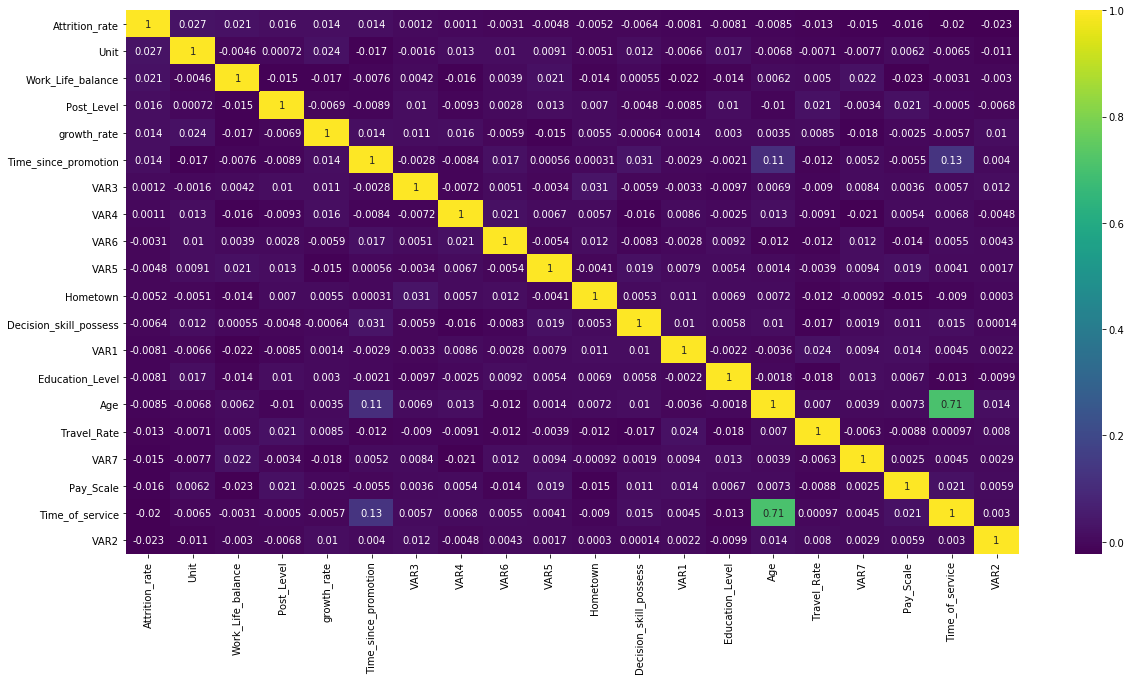

In [11]:
k=22
cols = train[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = train[cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# Let's see how many FEATURES are so important for our model prediction

##Recursive feature elimination with cross validation

In [12]:
#Correlation with output variable
cor = train.corr()
cor_target = abs(cor["Attrition_rate"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Age                       0.008505
Education_Level           0.008143
Hometown                  0.005180
Unit                      0.026602
Decision_skill_possess    0.006447
Time_of_service           0.019863
Time_since_promotion      0.013880
growth_rate               0.014247
Travel_Rate               0.012608
Post_Level                0.016402
Pay_Scale                 0.015643
Work_Life_balance         0.021115
VAR1                      0.008073
VAR2                      0.022906
VAR3                      0.001245
VAR4                      0.001051
VAR5                      0.004770
VAR6                      0.003130
VAR7                      0.015299
Attrition_rate            1.000000
Name: Attrition_rate, dtype: float64

In [13]:
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
print("Optimal no of features are :",rfe.n_features_)
rfe_x_train = x_train.columns[rfe.support_]
print("The columns are :",rfe_x_train)



[ True False False False False False False False False False  True  True
 False  True  True False  True False False False False  True]
[ 1 14  5  8  9  3  7 10  2 12  1  1  4  1  1  6  1 15 16 11 13  1]
Optimal no of features are : 7
The columns are : Index(['Gender', 'Travel_Rate', 'Post_Level', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR2', 'VAR7'],
      dtype='object')


Best alpha using built-in LassoCV: 0.000898
Best score using built-in LassoCV: 0.004818
Lasso picked 18 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

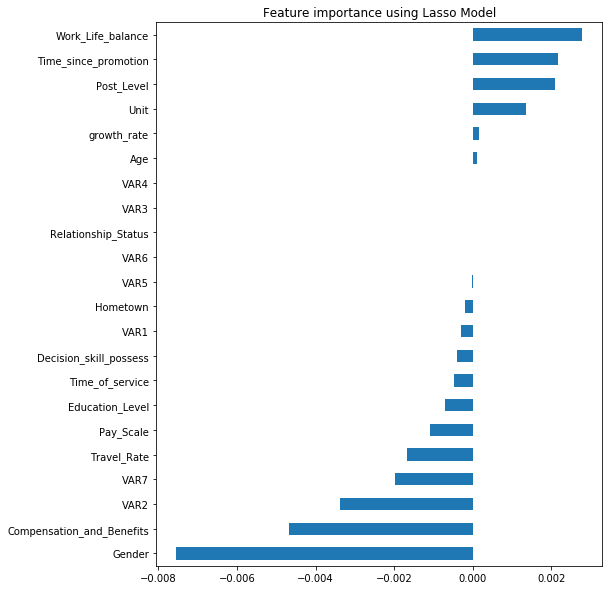

In [14]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Now we use RFE features to fit our model and see the results

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(x)
scaler.fit_transform(test)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
rfe_features = ['Gender', 'Travel_Rate', 'Post_Level', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR2', 'VAR7']

In [17]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)


br_rfe = br.fit(x_train_rfe,y_train)
print(br_rfe.score(x_test_rfe,y_test))

0.001941072613167005


In [18]:
train = train[rfe_features]
test = test[rfe_features]
br.fit(train,y)
y_predicted = br.predict(test)
Yhat=pd.DataFrame(y_predicted,columns=['Attrition_rate'])
var =pd.DataFrame(emp_id)
df_col = pd.concat([var,Yhat], axis=1)
df_col.to_csv("Prediction.csv",index=False)

df_col.head(5)

,Employee_ID,Attrition_rate
0,EID_22713,0.190794
1,EID_9658,0.191423
2,EID_22203,0.184515
3,EID_7652,0.202774
4,EID_6516,0.186509
